# Домашнее задание 6

Необходимо обучить нейронную сеть определять цифру на изображении по заданному вектору.

Game plan:
- Понять датасет и базовые взаимосвязи
    - Посмотреть .info() .describe()
    - Построить графики с основными данными
- Подготовить данные
- Выбор модели
- Обучение моделей
- Валидация

### Импортируем необходимые библиотеки

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns



import copy
import glob
import multiprocessing
import os

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from torch.nn.functional import softmax
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.datasets as dsets


from PIL import Image
from skimage import io, transform

from tqdm.notebook import tqdm
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


import tqdm as tqdm

### Достаем данные:

In [71]:
train = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Math\\Модуль 6. Нейронные сети\\train.csv')
test = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Math\\Модуль 6. Нейронные сети\\test.csv')
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [72]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


### Анализируем данные

In [73]:
len(train)

42000

In [74]:
y = train['label']
y = y.to_numpy()
train.drop(columns = ['label'], axis = 1, inplace=True)
X = train.to_numpy(dtype=np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=True, stratify=y)


val = test.to_numpy(dtype=np.float32)

In [75]:
# Переведем в тензор
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = torch.from_numpy(X_train).to(device)
X_test = torch.from_numpy(X_test).to(device)
y_train = torch.from_numpy(y_train).to(device)
y_test = torch.from_numpy(y_test).to(device)
val_tens = torch.from_numpy(val).to(device)

In [77]:
print(X_train.shape)
print(y_train.shape)

torch.Size([33600, 784])
torch.Size([33600])


### Подготовка данных для модели

In [79]:
# определим размеры слоев
input_size = 784
hidden_sizes = 200
output_size = 10

### Создаем модель

In [80]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes, output_size),
                      nn.Sigmoid())

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=10, bias=True)
  (3): Sigmoid()
)


In [81]:

criterion = torch.nn.CrossEntropyLoss()

In [82]:
# Зададим количество эпох и шаг
learning_rate = 0.0001
epochs = 10000

# Объявим оптимизатор:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Переменные для расчета метрики
correct, total = 0, 0

In [83]:
# Обучим
for cur_epoch in tqdm.trange(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_value = torch.argmax(y_pred, dim=1)
    correct += (y_value == y_train).sum().item()
    total += y_train.shape[0]
    if (cur_epoch + 1) % (epochs // 10) == 0:
        print(f'\tEpoch: {cur_epoch + 1}/{epochs}, Loss: {loss.item():.4f}')


 10%|█         | 1001/10000 [02:15<21:53,  6.85it/s]

	Epoch: 1000/10000, Loss: 1.8719


 20%|██        | 2001/10000 [04:33<17:56,  7.43it/s]

	Epoch: 2000/10000, Loss: 1.7659


 30%|███       | 3001/10000 [06:55<17:02,  6.84it/s]

	Epoch: 3000/10000, Loss: 1.7170


 40%|████      | 4001/10000 [09:26<16:01,  6.24it/s]

	Epoch: 4000/10000, Loss: 1.6854


 50%|█████     | 5001/10000 [11:57<12:25,  6.71it/s]

	Epoch: 5000/10000, Loss: 1.6607


 60%|██████    | 6001/10000 [14:28<09:37,  6.93it/s]

	Epoch: 6000/10000, Loss: 1.6392


 70%|███████   | 7001/10000 [16:59<07:42,  6.48it/s]

	Epoch: 7000/10000, Loss: 1.6230


 80%|████████  | 8001/10000 [19:31<05:03,  6.59it/s]

	Epoch: 8000/10000, Loss: 1.6110


 90%|█████████ | 9001/10000 [22:11<02:33,  6.50it/s]

	Epoch: 9000/10000, Loss: 1.6019


100%|██████████| 10000/10000 [24:53<00:00,  6.70it/s]

	Epoch: 10000/10000, Loss: 1.5945


In [84]:
print(f'Train Accuracy: {correct / total:.4f}')

Train Accuracy: 0.6868


#####  Train Accuracy: 0.6868
###  Проверка на тестовой части

In [85]:

model.eval()
correct, total = 0, 0
y_pred = model(X_test)
#loss = criterion(y_pred, y_test)
y_value = torch.argmax(y_pred, dim=1)
correct += (y_value == y_test).sum().item()
total += y_test.shape[0]

print(f'Test Accuracy: {correct / total:.4f}')

Test Accuracy: 0.8511


### Проверка на неразмеченном проверочном массиве. 

Номер элемента:  11834
Предсказанное число:  tensor(8)


(-0.5, 27.5, 27.5, -0.5)

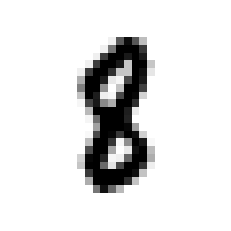

In [86]:
import random
model.eval()
number = random.randint(0, 27999)
print('Номер элемента: ', number)
y_pred = model(val_tens[number])
rez = torch.argmax(y_pred)
print('Предсказанное число: ', rez) #y_pred[rez])
temp = val.reshape(28000, 28, 28)
plt.imshow(temp[number], cmap='binary')
plt.axis('off')
